In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

SCIPY

We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.
Task:
1.fitting it to the periodic function
2.plot the fit
Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [2]:
temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

In [3]:
#fitting data into periodic function
from scipy import optimize

In [4]:

months = np.arange(12)
def yearly_temp(times,avg,ampl,time_offset):
    return (avg+ampl*np.cos((times + time_offset)* 1.8 * np.pi/times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temp,months,temp_max,[40,20,0])
res_min, cov_min = optimize.curve_fit(yearly_temp,months,temp_min,[-40,20,0])
    

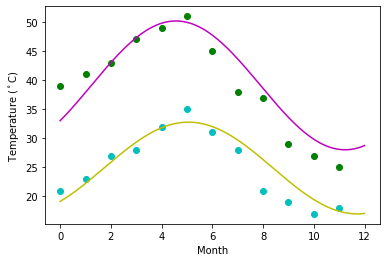

In [5]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'go')
plt.plot(days, yearly_temp(days, *res_max), 'm-')
plt.plot(months, temp_min, 'co')
plt.plot(days, yearly_temp(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

Matplotlib

In [6]:
#This assignment is for visualization using matplotlib:

In [7]:
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"

In [8]:
titanic = pd.read_csv(url)

In [9]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [10]:
titanic.isna().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [12]:
titanic.shape

(1310, 14)

Charts to plot
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [13]:
count = titanic['sex'].value_counts()
count

male      843
female    466
Name: sex, dtype: int64

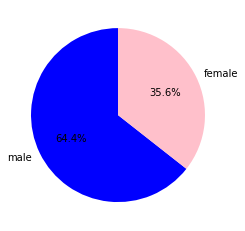

In [14]:
colors= ['Blue','pink']
labels = count.index
plt.pie(count,labels= labels, colors = colors, startangle=90, autopct='%.1f%%')
plt.show()

<string>:6: UserWarning: Warning: converting a masked element to nan.
/Users/smri/opt/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:722: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


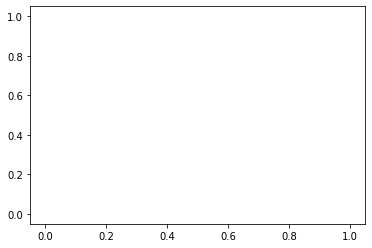

In [23]:
cols = {0: 'red', 1: 'blue'}
plt.scatter(titanic.age, titanic.fare, c=titanic.sex.map(cols))
plt.show()

In [24]:
# lets solve this error which we are getting because of nan value in a rows:

In [25]:
df=titanic

In [26]:
is_nan=df.isnull()
row_has_nan= is_nan.any(axis=1)
rows_with_nan=df[row_has_nan]
print(rows_with_nan)

      pclass  survived                                             name  \
0        1.0       1.0                    Allen, Miss. Elisabeth Walton   
1        1.0       1.0                   Allison, Master. Hudson Trevor   
2        1.0       0.0                     Allison, Miss. Helen Loraine   
3        1.0       0.0             Allison, Mr. Hudson Joshua Creighton   
4        1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1305     3.0       0.0                            Zabour, Miss. Thamine   
1306     3.0       0.0                        Zakarian, Mr. Mapriededer   
1307     3.0       0.0                              Zakarian, Mr. Ortin   
1308     3.0       0.0                               Zimmerman, Mr. Leo   
1309     NaN       NaN                                              NaN   

         sex      age  sibsp  parch  ticket      fare    cabin embarked boat  \
0     female  29.00

In [27]:
df_new = df.drop(index=[1309])

In [28]:
df_new.shape

(1309, 14)

In [29]:
import seaborn as sns

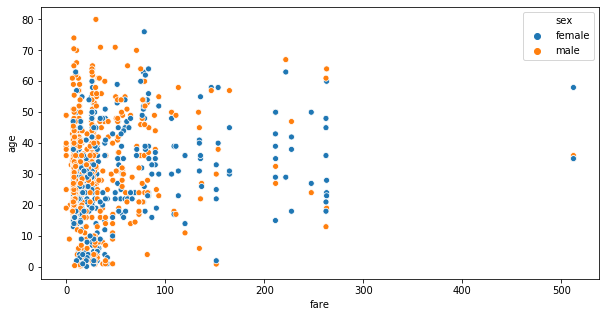

In [30]:
f, ax = plt.subplots(1,1, figsize=(10, 5))
sns.scatterplot(x="fare", y="age", hue="sex", data=df_new, ax=ax)